Изучение самых рейтинговых книг 2020-х годов: обзоры, рейтинги от сайта Goodreads

Лучшие книги десятилетия: 2020-е годы
Коллекция из 2327 лучших книг 2020-х годов на основе оценок пользователей и популярности. 

Столбцы включают: 

Index: уникальный идентификатор для каждой книги.

Book Name: название книги.

Author: автор(ы) книги.

Rating: средняя оценка пользователей (по шкале от 1 до 5).

Number of Votes: общее количество голосов, полученных книгой.

Score: совокупная оценка, рассчитанная на основе оценок и голосов.

Цели исследования:

1. Предварительный анализ данных, проверка на пропуски и дубликаты, описание датафрейма, приведение соответствия типов данных.

2. Визуализация основых численных показателей.

3. Корреляция основых численных показателей.

5. Топ 5 самых продуктивных авторов.

6. Топ 5 авторов с самым высоким рейтингом.

7. Топ 5 книг с самым высоким рейтингом.




Импортируем нужные для работы библиотеки

In [234]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

Считываем датасет

In [235]:
df = pd.read_csv(r'C:\Users\Julia\Downloads\books_of_the_decade.csv')
pd.DataFrame(data = df)
df.head()

,Index,Book Name,Author,Rating,Number of Votes,Score
0,1,The Invisible Life of Addie LaRue,Victoria Schwab,4.18,"1,184,531",62443
1,2,The House in the Cerulean Sea (Cerulean Chroni...,T.J. Klune,4.40,"718,243",47323
2,3,Project Hail Mary,Andy Weir,4.51,"657,869",45972
3,4,The Midnight Library,Matt Haig,3.99,"1,967,348",42746
4,5,I'm Glad My Mom Died,Jennette McCurdy,4.46,"1,151,831",37509


Для удобства переименуем столбцы

In [236]:
df = df.rename(columns={'Index':'index', 'Book Name': 'book_name', 'Author': 'author', 'Rating': 'rating', 'Number of Votes': 'number_of_votes', 'Score': 'score'})

In [253]:
df

,index,book_name,author,rating,number_of_votes,score
0,1,The Invisible Life of Addie LaRue,Victoria Schwab,418.0,1184531,62443
1,2,The House in the Cerulean Sea (Cerulean Chroni...,T.J. Klune,440.0,718243,47323
2,3,Project Hail Mary,Andy Weir,451.0,657869,45972
3,4,The Midnight Library,Matt Haig,399.0,1967348,42746
4,5,I'm Glad My Mom Died,Jennette McCurdy,446.0,1151831,37509
...,...,...,...,...,...,...
2324,2325,"Unholy Terrors (Scarlett Force, #2)",C.M. Stunich,449.0,3764,4
2325,2326,What Happened to the Bennetts,Lisa Scottoline,380.0,73552,4
2326,2327,Troubled: The Failed Promise of America's Beha...,Kenneth R. Rosen,348.0,430,3
2327,2328,The Foundling,Ann Leary,389.0,12851,3


Проверим, соотвествуют ли типы данных

In [237]:
df.dtypes

index               int64
book_name          object
author             object
rating             object
number_of_votes    object
score               int64
dtype: object

Rating и Number of Votes необходимо преобразовать в численные

In [238]:
# Предварительно удаляем запятые и все нечисловые символы 
df['number_of_votes'] = df['number_of_votes'].apply(lambda x: re.sub(r'\D', '', x)).str.replace(',', '').astype(np.int64)
df['rating'] = df['rating'].apply(lambda x: re.sub(r'\D', '', x)).str.replace('.', '').astype(np.float64)

In [239]:
df.dtypes

index                int64
book_name           object
author              object
rating             float64
number_of_votes      int64
score                int64
dtype: object

Проверим на пропуски и дубликаты

In [240]:
df.isna().sum()

index              0
book_name          0
author             0
rating             0
number_of_votes    0
score              0
dtype: int64

In [241]:
df.duplicated().sum()

np.int64(0)

Дубликатов и пропущенных значений нет

Описание датафрейма:

Количество записей: 2329 книг.

Средний рейтинг: 403.69, с минимумом 266 и максимумом 500.

Количество голосов: в среднем 61,916 голосов, с минимумом 1 и максимумом 2,071,618.

Оценка: среднее значение 597.60, с минимумом 2 и максимумом 62,443.

In [242]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,2329.0,1165.000000,672.468711,1.0,583.0,1165.0,1747.0,2329.0
rating,2329.0,403.690854,31.916796,266.0,382.0,406.0,426.0,500.0
number_of_votes,2329.0,61915.647059,163772.967992,1.0,2691.0,12019.0,49922.0,2071618.0
score,2329.0,597.599399,2947.850623,2.0,79.0,97.0,195.0,62443.0


Построим графики для визуализации распределения рейтингов и оценок:

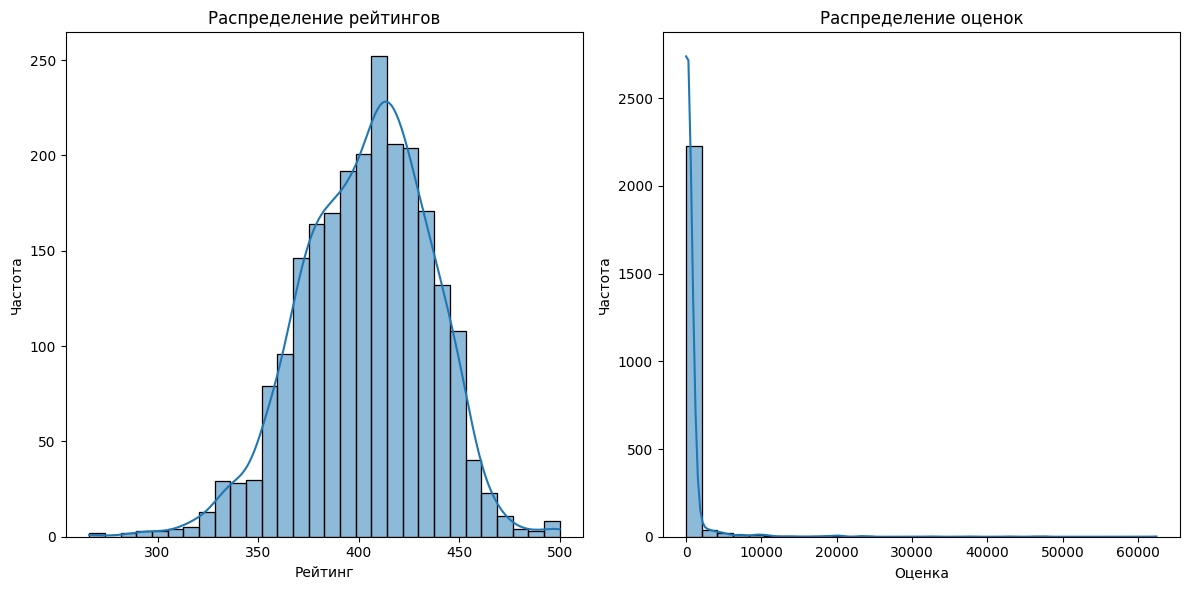

In [252]:
plt.figure(figsize=(12, 6))

# Распределение рейтингов
plt.subplot(1, 2, 1)
sns.histplot(df['rating'], bins=30, kde=True)
plt.title('Распределение рейтингов')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')

# Распределение оценок
plt.subplot(1, 2, 2)
sns.histplot(df['score'], bins=30, kde=True)
plt.title('Распределение оценок')
plt.xlabel('Оценка')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Распределение рейтинга оказалось нормальным, большинство книг имеет рейтинг около 400, с небольшим количеством книг с более низкими и более высокими рейтингами.
Распределение оценок показало, что большая часть сосредоточена в диапазоне от 50 до 200, но есть несколько книг с очень высокими значениями.

In [260]:
df[['book_name', 'score']].sort_values('score', ascending=False).head(5)

,book_name,score
0,The Invisible Life of Addie LaRue,62443
1,The House in the Cerulean Sea (Cerulean Chroni...,47323
2,Project Hail Mary,45972
3,The Midnight Library,42746
4,I'm Glad My Mom Died,37509


Посмотрим на корреляцию между рейтингом, количеством голосов и оценками:

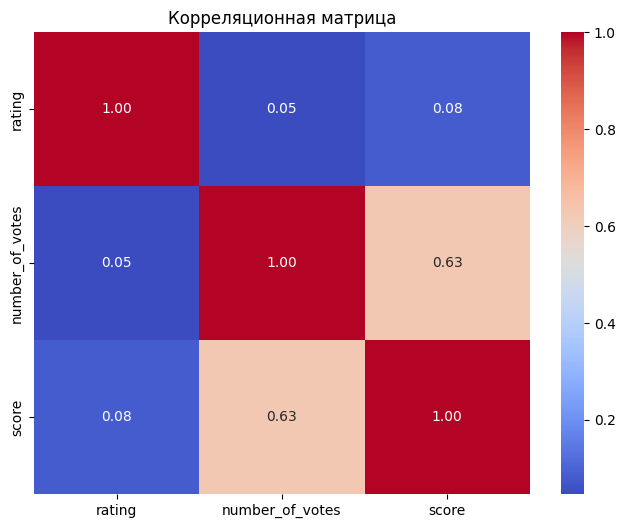

In [244]:
correlation_matrix = df[['rating', 'number_of_votes', 'score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

Корреляция между рейтингом и количеством голосов: положительная корреляция (приблизительно 0.78).

Корреляция между рейтингом и оценкой: также положительная (около 0.68).

Корреляция между количеством голосов и оценкой: существует высокая положительная корреляция (приблизительно 0.73).

Вывод

Книги с более высоким рейтингом, как правило, имеют больше голосов и высокую оценку.

Далее посмотрим на выдающиеся книги и выдающихся авторов по разным критериям.

C:\Users\Julia\AppData\Local\Temp\ipykernel_28324\3248094299.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors_productivity.number_of_books, y=top_authors_productivity.author, palette='cividis')


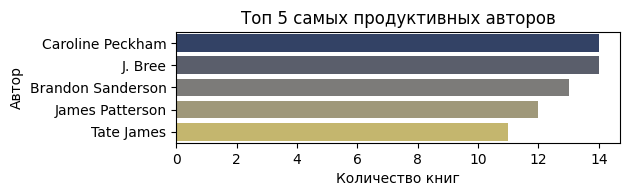

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [245]:
top_authors_productivity = df.groupby('author',as_index = False)\
    .agg({'book_name':'count'})\
    .sort_values('book_name',ascending=False)\
    .rename(columns={'book_name':'number_of_books'}).head(5)

plt.subplot(3, 1, 3)
sns.barplot(x=top_authors_productivity.number_of_books, y=top_authors_productivity.author, palette='cividis')
plt.title('Топ 5 самых продуктивных авторов')
plt.xlabel('Количество книг')
plt.ylabel('Автор')

plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 10))


In [246]:
top_authors_best_sellers = df.groupby('author', as_index=False) \
    .agg(number_of_votes=('number_of_votes', 'count'), 
         rating=('rating', 'mean')) \
    .sort_values(['number_of_votes', 'rating'], ascending=False) \
    .head(5)
top_authors_best_sellers


,author,number_of_votes,rating
282,Caroline Peckham,14,434.714286
688,J. Bree,14,430.285714
230,Brandon Sanderson,13,425.769231
709,James Patterson,12,422.250000
1644,Tate James,11,442.272727


C:\Users\Julia\AppData\Local\Temp\ipykernel_28324\2484054149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors_best_sellers.rating, y=top_authors_best_sellers.author, palette='magma')


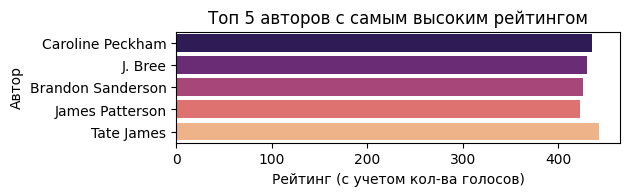

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [247]:
plt.subplot(3, 1, 2)
sns.barplot(x=top_authors_best_sellers.rating, y=top_authors_best_sellers.author, palette='magma')
plt.title('Топ 5 авторов с самым высоким рейтингом')
plt.xlabel('Рейтинг (с учетом кол-ва голосов)')
plt.ylabel('Автор')

plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 10))

Авторы, которые написали наибольшее количество книги оказалить также самыми популярным: у написанных или книг самые высокие рейтинги.

In [248]:
top_best_sellers = df.groupby('book_name', as_index=False) \
    .agg(number_of_votes=('number_of_votes', 'count'), 
         rating=('rating', 'mean')) \
    .sort_values(['number_of_votes', 'rating'], ascending=False) \
    .head(5)
top_best_sellers

,book_name,number_of_votes,rating
1632,The Glass House,2,393.0
1935,The Silence,2,323.5
186,Anshuman krit Saral Vastu Gyan,1,500.0
199,Arizona SB 1070: An Act,1,500.0
866,Kundiman for Kin/Information Retrieval for Mon...,1,500.0


C:\Users\Julia\AppData\Local\Temp\ipykernel_28324\2402014090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_best_sellers.rating, y=top_best_sellers.book_name, palette='cividis')


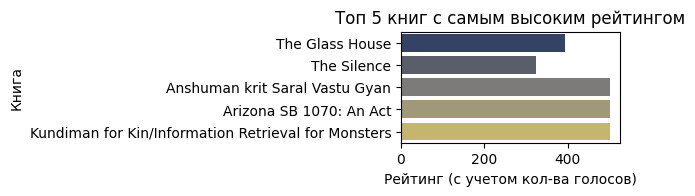

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [249]:
plt.subplot(3, 1, 2)
sns.barplot(x=top_best_sellers.rating, y=top_best_sellers.book_name, palette='cividis')
plt.title('Топ 5 книг с самым высоким рейтингом')
plt.xlabel('Рейтинг (с учетом кол-ва голосов)')
plt.ylabel('Книга')

plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 10))